## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking at prospective properties to buy to enter the market. The obective of the study is to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not

### Business objective:


- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.


In [1]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## 01. Data import 

In [3]:
## importing from the csv file
df_house_price = pd.read_csv('train.csv')

In [4]:
## checking the dimension of the data set
df_house_price.shape

(1460, 81)

In [5]:
pd.set_option('display.max_rows', df_house_price.shape[0]+1)

In [6]:
## Checking the top rows
df_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
## Checking the columns in the dataframe
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 02. Data understanding and exploration

**checking numerical columns**

In [8]:
## checking the numerical columns
df_house_price.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

**Check for duplicates**

In [9]:
df_house_price[df_house_price.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

**Conclusion:** We do not have any duplicates in this dataset.

**Checking null values**

In [10]:
## checking for  null values in the columns
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

#### Further analysis on null values in numerical and categorical columns

In [11]:
## checking for null values in the categorical column- imputation required
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Electrical         1
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [12]:
## check the null values in the numerical data

df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

### Data cleaning

**Replace all NA values with None in the missing categorical columns**

In [13]:
for col,val in df_categorical_with_missing.iteritems():
    df_house_price[col]= df_house_price[col].fillna('None')
   

In [14]:
## check all the categorical columns and distribution of different values for categories
sns.set(font_scale=3) 
categorical_columns = df_house_price.select_dtypes(include=['object'])
fig = plt.figure(figsize=(40,300))
count=1
for col in categorical_columns:
    plt.subplot(22, 2, count)
    plt.xticks(rotation=70)
    sns.countplot(x =df_house_price[col], data = df_house_price) 
  
    count=count+1
    
plt.tight_layout()
plt.show()

    

**We can see there are some categorical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [15]:
## The following categorical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (categorical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']


In [16]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 60)

**Total 21 colums have been dropped**

In [17]:
## Let's have a further look at the dataset
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [18]:
## Check again for further null values in the categorical columns
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Series([], dtype: int64)

#### There is no null values in the remaining categorical columns.

**Now let's impute null values in the numerical columns**

In [19]:
## check numerical colums for null values
df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [20]:
## Let's have an insight with the null values for the following colums
df_house_price[['MasVnrArea','GarageYrBlt','LotFrontage']].describe([0.25,0.50,0.75,0.99])


MasVnrArea  GarageYrBlt  LotFrontage
count  1452.000000  1379.000000  1201.000000
mean    103.685262  1978.506164    70.049958
std     181.066207    24.689725    24.284752
min       0.000000  1900.000000    21.000000
25%       0.000000  1961.000000    59.000000
50%       0.000000  1980.000000    69.000000
75%     166.000000  2002.000000    80.000000
99%     791.920000  2009.000000   141.000000
max    1600.000000  2010.000000   313.000000

In [21]:
## The following two columns can be imputated with the median values
## LotFrontage: Linear feet of street connected to property
## MasVnrArea: Masonry veneer area in square feet
df_house_price['LotFrontage'] = df_house_price['LotFrontage'].replace(np.nan, df_house_price['LotFrontage'].median())
df_house_price['MasVnrArea'] = df_house_price['MasVnrArea'].replace(np.nan, df_house_price['MasVnrArea'].median())

In [22]:
## Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below
## GarageYrBlt: Year garage was built
df_house_price['GarageYrBlt']=df_house_price['GarageYrBlt'].fillna(0)
df_house_price['GarageYrBlt'] = df_house_price['GarageYrBlt'].astype(int)

**In this dataframe , we have some year columns (raw attributes) - Let's try to derive some features from the raw attributes**

In [23]:
yr_cols = [col for col in df_house_price.columns if 'yr' in col.lower() or 'year' in col.lower() ]
print(yr_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [24]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_house_price['IsRemodelled'] = df_house_price.apply(checkForRemodel, axis=1)
df_house_price['IsRemodelled'].head()

0    0
1    0
2    1
3    1
4    0
Name: IsRemodelled, dtype: int64

In [25]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_house_price['BuiltOrRemodelAge'] = df_house_price.apply(getBuiltOrRemodelAge, axis=1)
df_house_price['BuiltOrRemodelAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

In [26]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_house_price['OldOrNewGarage'] = df_house_price['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_house_price['OldOrNewGarage'].head()

0    1
1    0
2    1
3    0
4    1
Name: OldOrNewGarage, dtype: int64

**We have created new derived colums from all the year columns. We don't need year columns anymore as we are going to analyze the derived features. Let's drop them.**

In [27]:
df_house_price.drop(yr_cols, axis = 1, inplace = True)

#### Let's visualize the distribution of values in the numerical columns

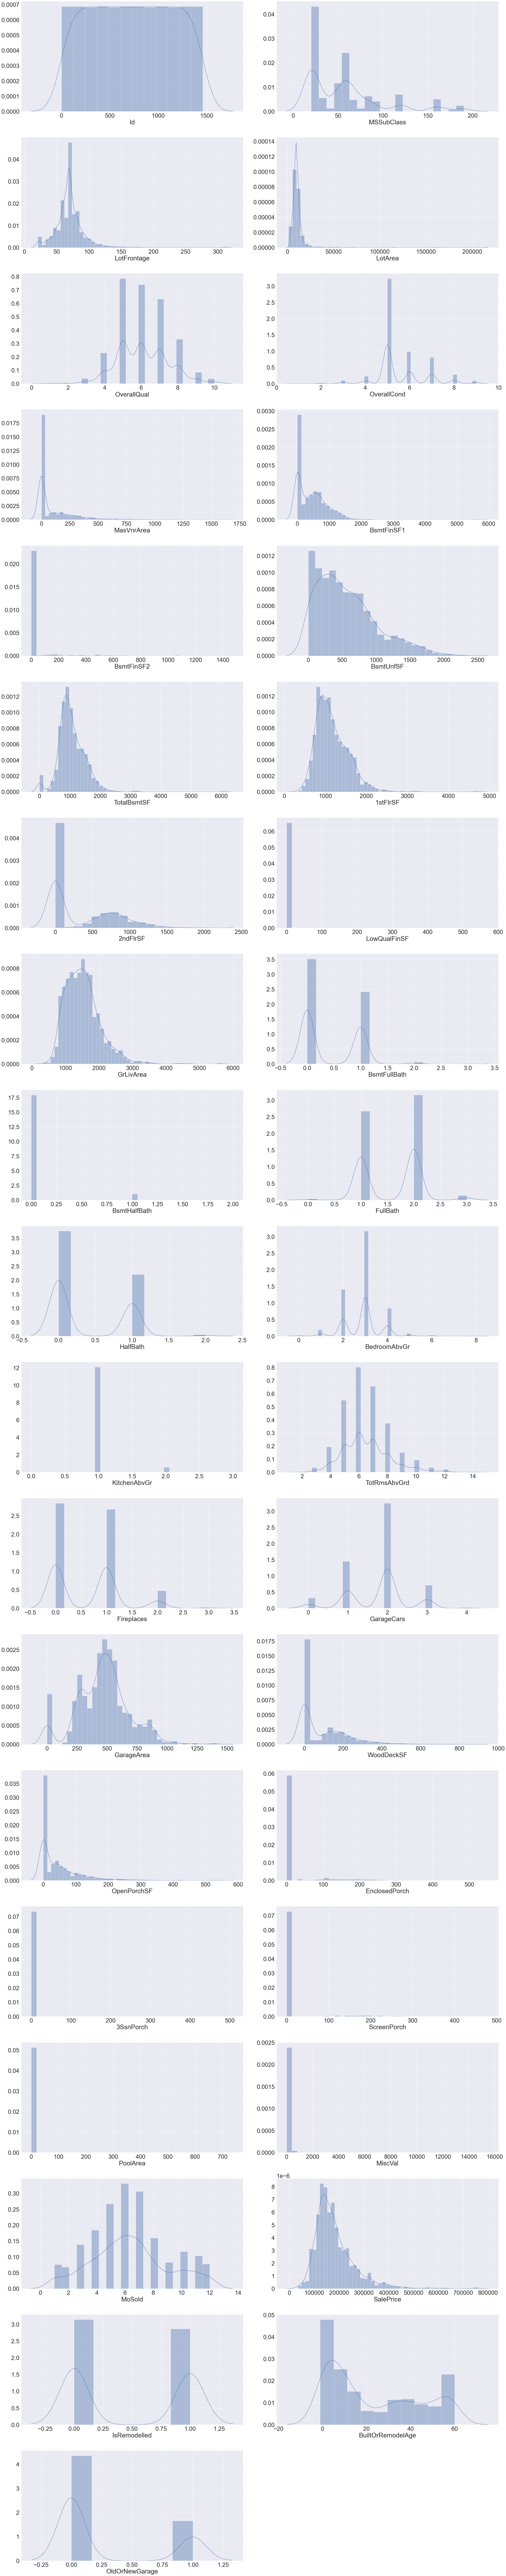

In [28]:
## Check numerical columns
sns.set(font_scale=3) 
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float'])
fig = plt.figure(figsize=(40,200))
count=1

for col in (numerical_columns):
    plt.subplot(19, 2, count)
    sns.distplot(df_house_price[col],);
    count = count+1

plt.tight_layout()
plt.show()

**We can see there are some numerical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [29]:
## The following numerical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (numerical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [30]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 50)

In [31]:
## Since we have derived some features from the YrSold - the following variables are not important
## MoSold: Month Sold (MM)
## Let's drop it

df_house_price.drop('MoSold' , axis=1, inplace=True)
df_house_price.shape

(1460, 49)

**Check for null and duplicate values**

In [32]:
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [33]:
df_house_price[df_house_price.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 49 columns]

**We have no null values and no duplicate values present**

In [34]:
## Id is not important for the analysis - Let's drop it.
df_house_price.drop('Id' , axis=1, inplace=True)
df_house_price.shape

(1460, 48)

#### Outlier treatment

In [35]:
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float']).columns
df_house_price[numerical_columns].describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.731373   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000  ...   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
90%        9.000000     1.000000     3.000000   757.100000   262.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice  IsRemodelled  BuiltOrRemodelAge  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     46.660274  180921.195890      0.476712          22.950000   
std      66.256028   79442.502883      0.499629          20.640653   
min       0.000000   34900.000000      0.000000          -1.000000   
25%       0.000000  129975.000000      0.000000           4.000000   
50%      25.000000  163000.000000      0.000000          14.000000   
75%      68.000000  214000.000000      1.000000          41.000000   
90%     130.000000  278000.000000      1.000000          56.000000   
95%     175.050000  326100.000000      1.000000          58.000000   
99%     285.820000  442567.010000      1.000000          60.000000   
max     547.000000  755000.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 26 columns]

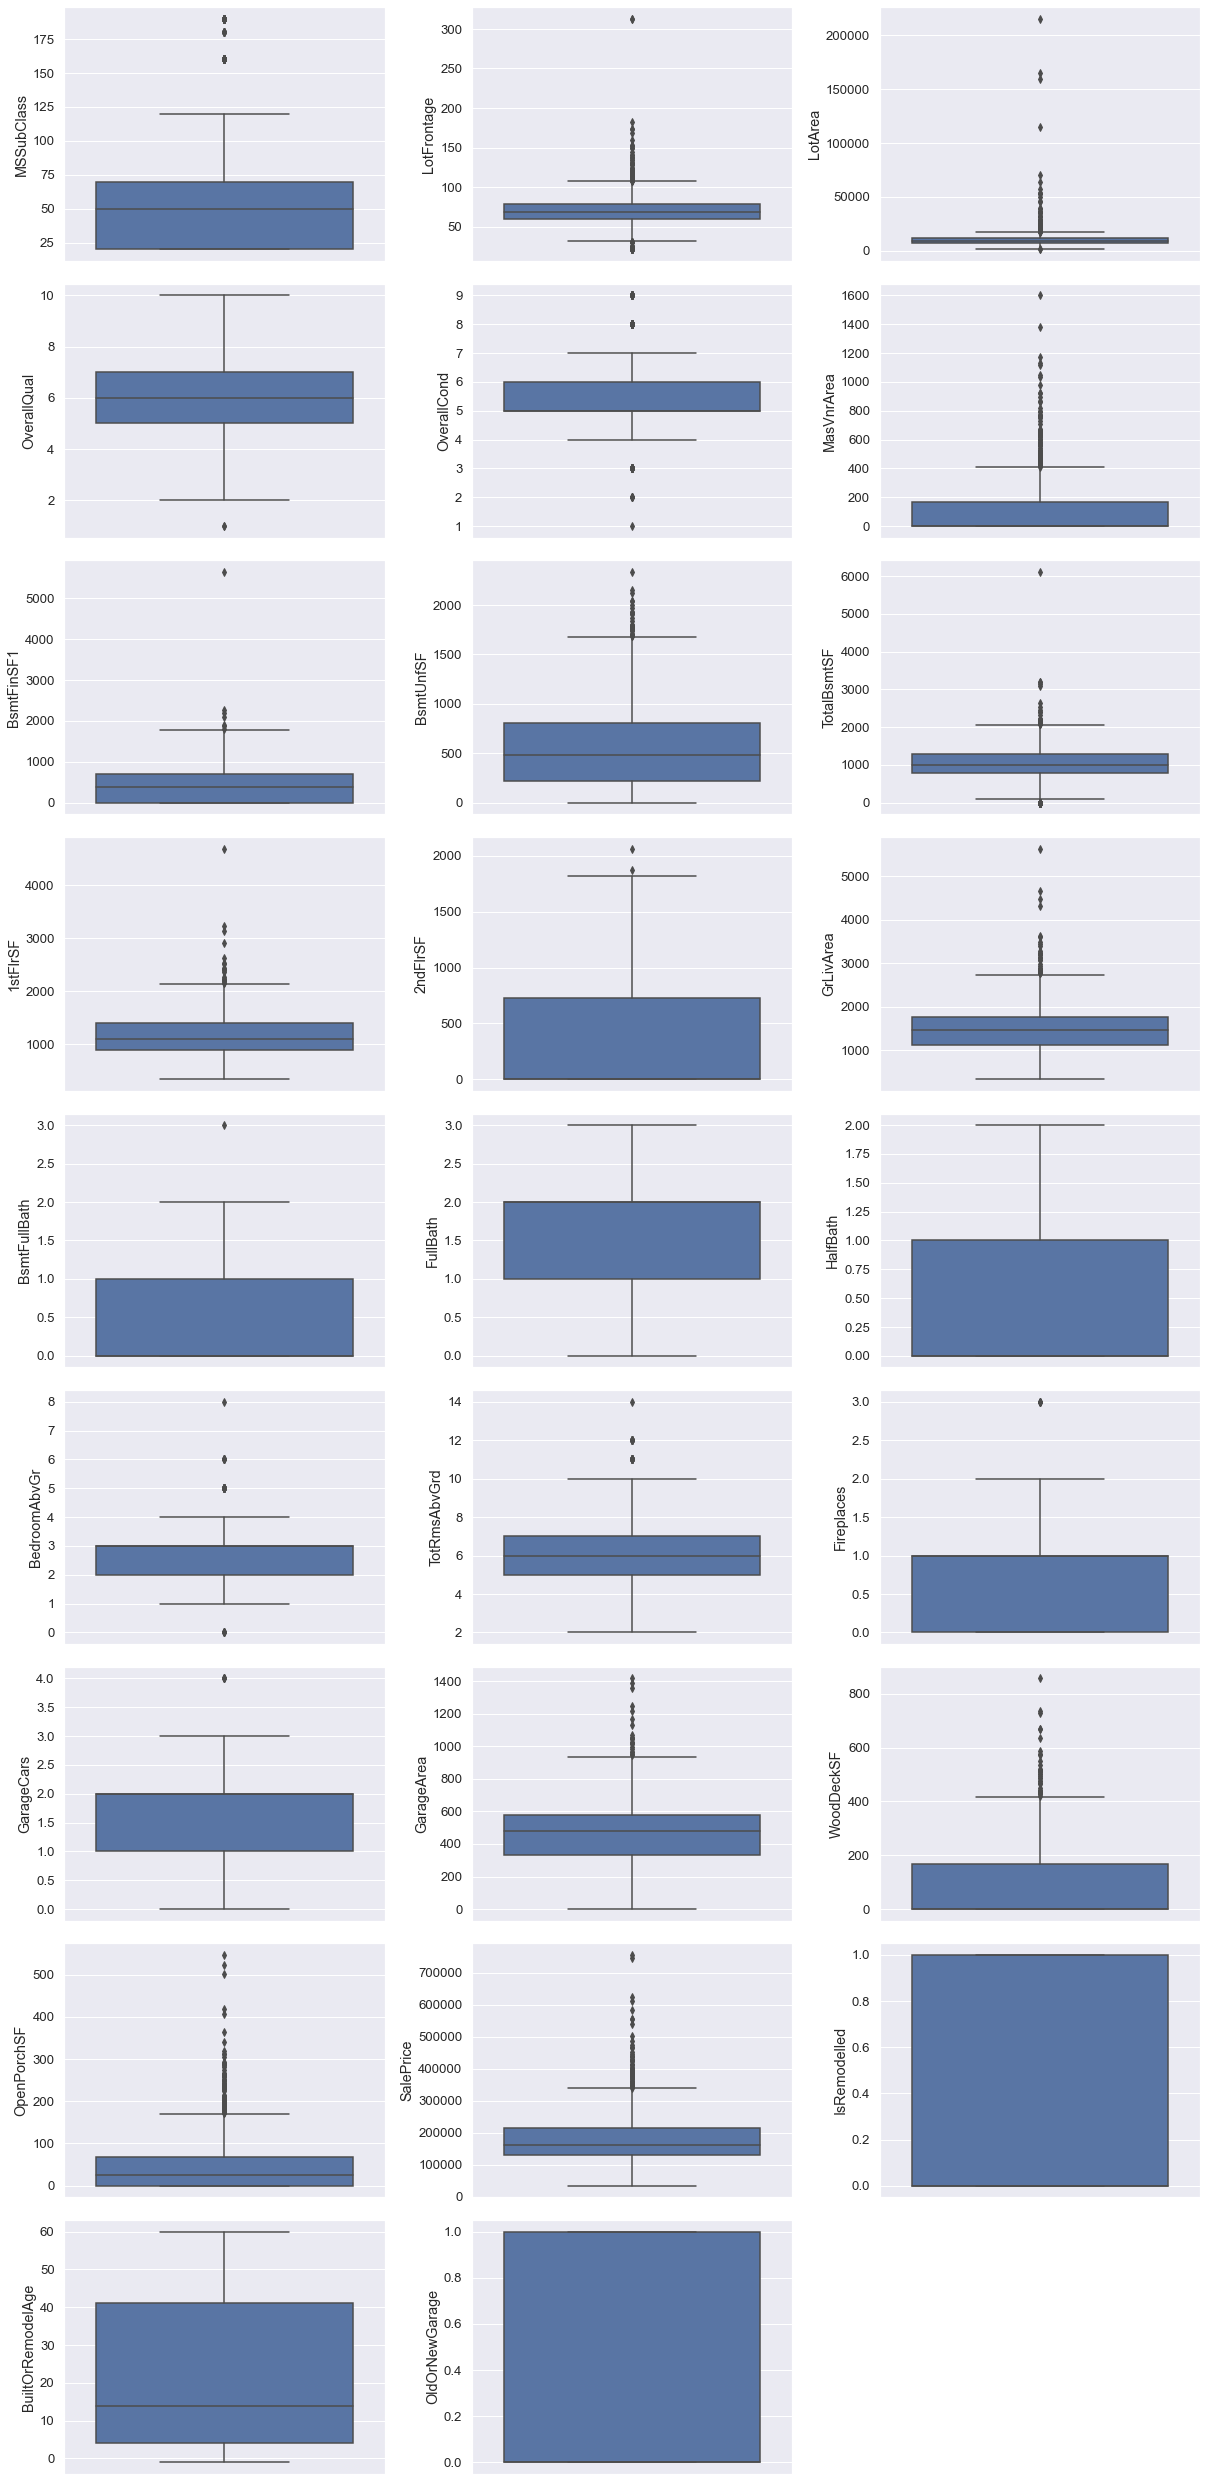

In [36]:
## Lets visualize the data
sns.set(font_scale=1.2) 
plt.figure(figsize=(17, 100))
count = 1
for col in numerical_columns:
    plt.subplot(len(numerical_columns),3,count)
    sns.boxplot(y = col, data = df_house_price)
    count=count+1
plt.tight_layout()
plt.show()

#### We assume that the lower quantile 0.25 and upper quantile 0.99.

In [37]:
## Drop the outliers outside 25 and 99 percentile
def drop_outliers(x):
    list = []
    for col in numerical_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_house_price = drop_outliers(df_house_price)

In [38]:
df_house_price.shape

(1453, 48)

In [39]:
# Determine the percentage of data retained
num_data = round(100*(len(df_house_price)/1460),2)
print(num_data)

99.52


**We are able to retain 99.52% data after data cleaning**

#### Data visualization

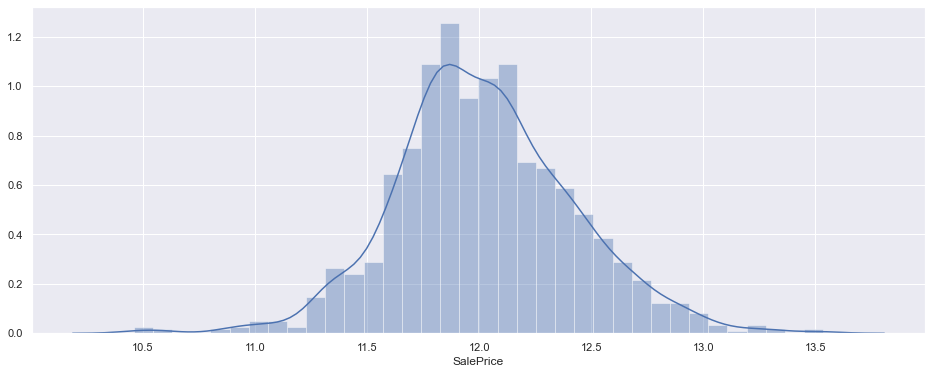

In [40]:
## Let's have a look at the distribution of the target variables
sns.set(font_scale=1) 
df_house_price['SalePrice'] = np.log1p(df_house_price['SalePrice'])


plt.figure(figsize=(16,6))
sns.distplot(df_house_price.SalePrice)
plt.show()

<Figure size 720x360 with 0 Axes>

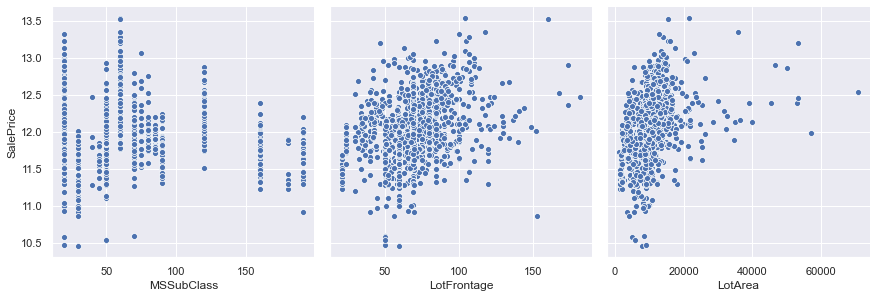

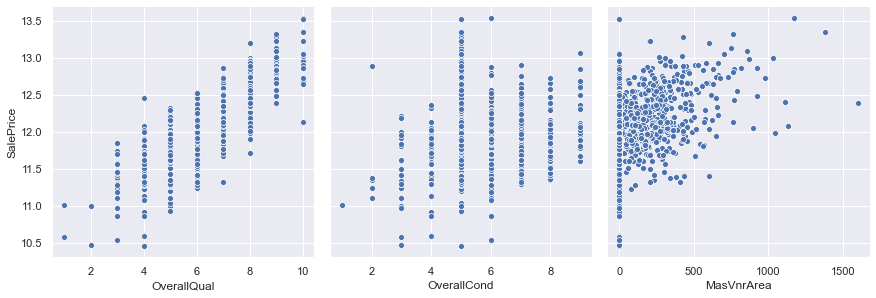

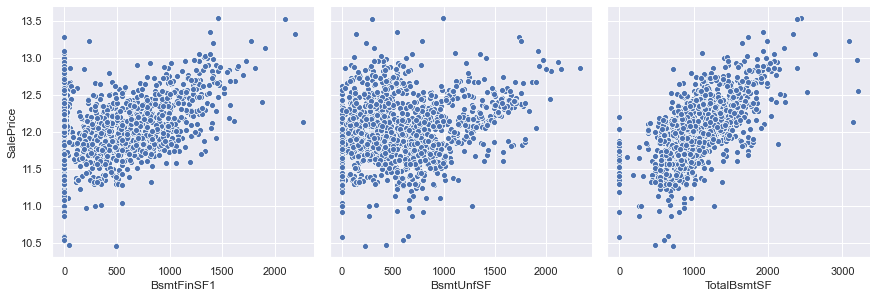

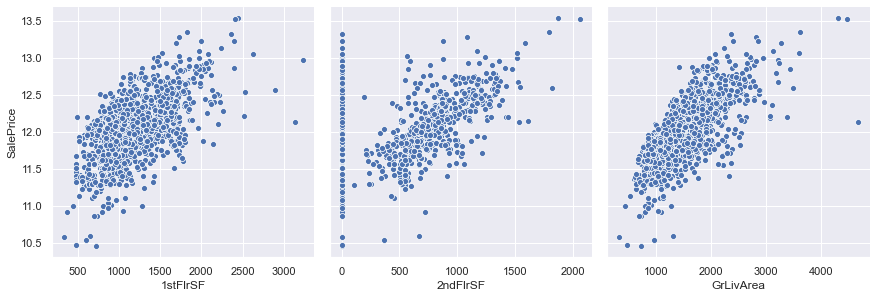

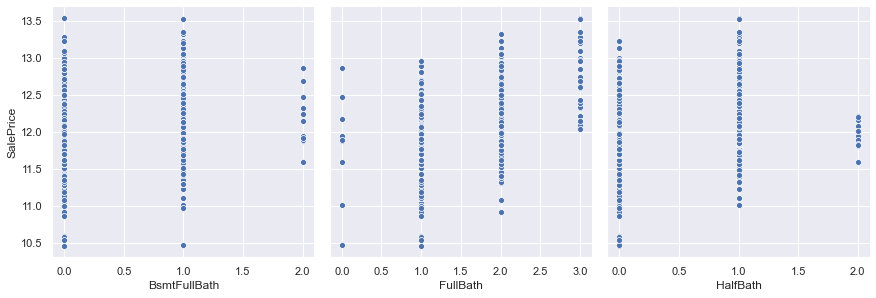

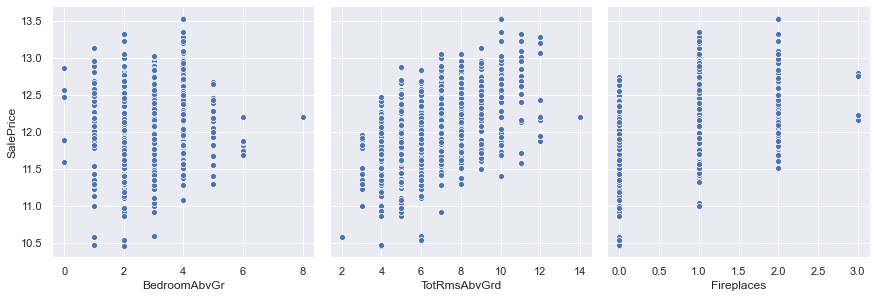

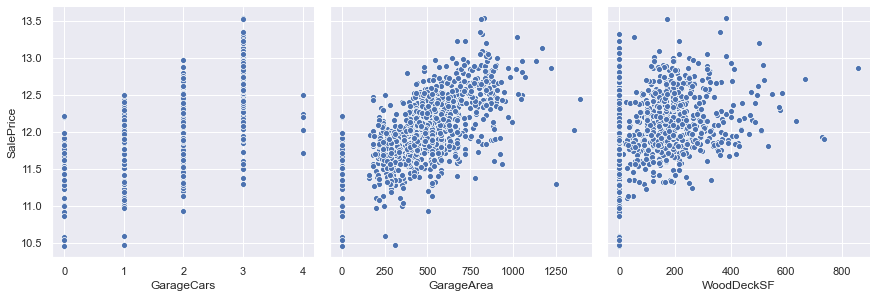

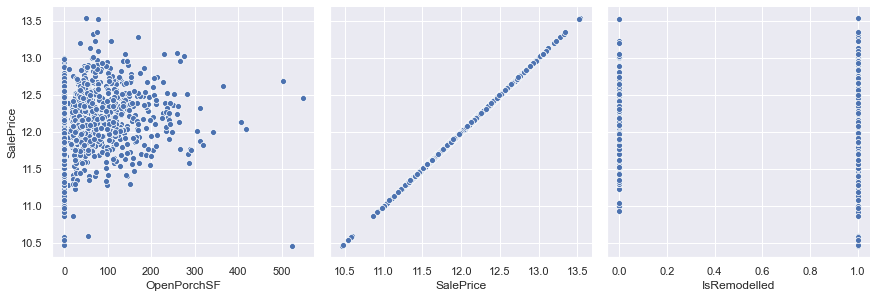

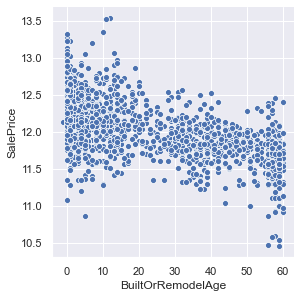

In [41]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df_house_price, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()



**Observations :**
- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis



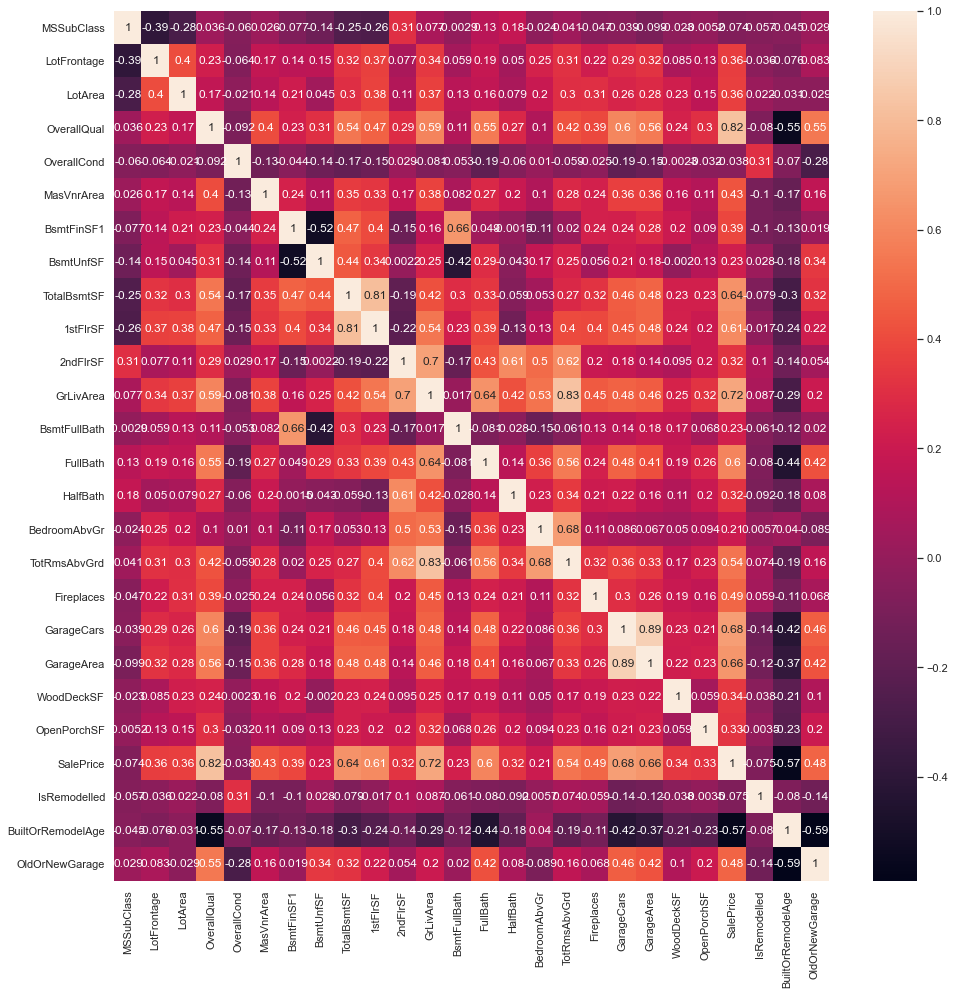

In [42]:
plt.figure(figsize=(16,16))
sns.heatmap(df_house_price[list(df_house_price.dtypes[df_house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()



**Removing following columns which shows high correlation**

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%



In [43]:
## Removing the highly correlated variables
df_house_price.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [44]:
## Check the shape of the data
df_house_price.shape

(1453, 46)

## 03. Data preparation

- Converting the ordered categorical data to numeric
- Create dummies for unordered categorical ones.

In [45]:
## Since the values of the following variables are ordered categorical list, we shall assign values to them in sequence
## For values which can be ordered, we have given an ordered sequence value
## For values which cannot be ordered, we have categorised them into 0 and 1

df_house_price['LotShape'] = df_house_price['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_house_price['ExterQual'] = df_house_price['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_house_price['BsmtQual'] = df_house_price['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['BsmtExposure'] = df_house_price['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_house_price['BsmtFinType1'] = df_house_price['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_house_price['HeatingQC'] = df_house_price['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['FireplaceQu'] = df_house_price['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['GarageFinish'] = df_house_price['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_house_price['BldgType'] = df_house_price['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_house_price['HouseStyle'] = df_house_price['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_house_price['Fence'] = df_house_price['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_house_price['LotConfig'] = df_house_price['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_house_price['MasVnrType'] = df_house_price['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_house_price['SaleCondition'] = df_house_price['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df_house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  ...  GarageFinish  \
0      CollgCr         1           4            7  ...             2   
1      Veenker         1           1            6  ...             2   
2      CollgCr         1           4            7  ...             2   
3      Crawfor         1           4            7  ...             1   
4      NoRidge         1           4            8  ...             2   

  GarageCars WoodDeckSF OpenPorchSF  Fence  SaleCondition  SalePrice  \
0          2          0          61      0              1  12.247699   
1          2        298           0      0              1  12.109016   
2          2          0          42      0              1  12.317171   
3          3          0          35      0              0  11.849405   
4          3        192          84      0              1  12.429220   

  IsRemodelled  BuiltOrRemodelAge  OldOrNewGarage  
0            0                  5               1  
1            0                 31               0  
2            1                  6               1  
3            1                 36               0  
4            0                  8               1  

[5 rows x 46 columns]

In [46]:
df_house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'Fence', 'SaleCondition', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

In [47]:
# For the following columns create dummies
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df_house_price['MSZoning'], prefix='MSZoning', drop_first = True)
df_house_price = pd.concat([df_house_price, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df_house_price['Neighborhood'], prefix='Neighborhood', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df_house_price['RoofStyle'], prefix='RoofStyle', drop_first = True)
df_house_price = pd.concat([df_house_price, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df_house_price['Exterior1st'], prefix='Exterior1st', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df_house_price['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df_house_price['Foundation'], prefix='Foundation', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df_house_price['GarageType'], prefix='GarageType', drop_first = True)
df_house_price = pd.concat([df_house_price, d_GarageType], axis = 1)

df_house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  ...  Foundation_PConc  \
0      CollgCr         1           4            7  ...                 1   
1      Veenker         1           1            6  ...                 0   
2      CollgCr         1           4            7  ...                 1   
3      Crawfor         1           4            7  ...                 0   
4      NoRidge         1           4            8  ...                 1   

  Foundation_Slab Foundation_Stone Foundation_Wood  GarageType_Attchd  \
0               0                0               0                  1   
1               0                0               0                  1   
2               0                0               0                  1   
3               0                0               0                  0   
4               0                0               0                  1   

   GarageType_Basment  GarageType_BuiltIn GarageType_CarPort  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 119 columns]

In [48]:
# drop the below columns as we now have new columns derived from these columns

df_house_price = df_house_price.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df_house_price.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           1  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           1  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           1  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 112 columns]

In [49]:
## Checking if all the columns are converted to numeric
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 557.6 KB


In [50]:
print(df_house_price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 557.6 KB
None


**We have converted all the columns to numerical ones.**

## 04. Train Test Split

In [51]:
# Putting all feature variable to X
X = df_house_price.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           1  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           1  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           1  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 111 columns]

In [52]:
# Putting response variable to y
y = df_house_price['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

**Note as scale of our dependent valriable SalePrice is very different with the independent variable. So we are scaling the dependent variable**. 

<p>
For details please refer <a herf = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html">here.</a> 
</p>

In [53]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrType',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

#### Creating the train and test dataset on the validation purposes.

In [54]:
# split into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [55]:
## Shape of the original data
df_house_price.shape

(1453, 112)

In [56]:
## Shape of train set
X_train.shape

(1017, 111)

In [57]:
## Shape of test set
X_test.shape

(436, 111)

In [58]:
## Shape of train set - Target variable
y_train.shape

(1017,)

In [59]:
## Shape of test set - Target variable
y_test.shape

(436,)

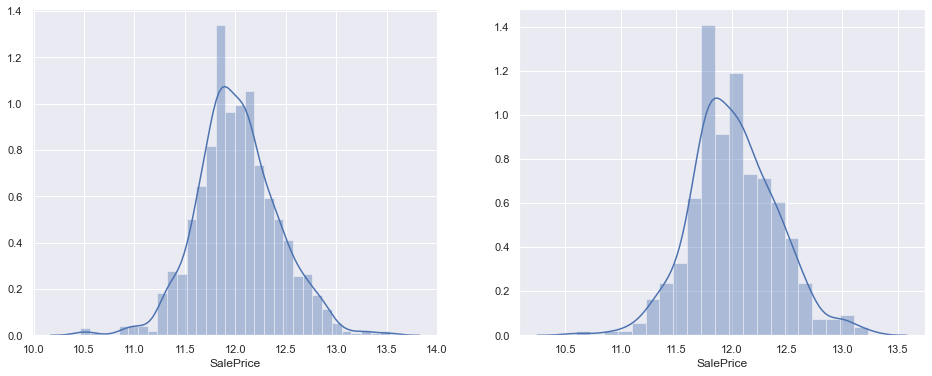

In [60]:
## Lets check the distribution after scaling and train-test split
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)
plt.subplot(122)
sns.distplot(y_test)
plt.show()

## 05. Recursive Feature Elimination

<P>Let's try to find optimal number of Features using RFE. Since we have 112 features. 10- Fold cross validation will try to generate 1120 fits which is very time consuming.Hence , try to find out 50 optimal features using RFE.</P>

In [61]:
len(X_train.columns)

111

In [62]:
## RFE with 50 features
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [63]:
## Let's build a dataframe out of RFE columns
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [64]:
## Let's check for the selected columns
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print(rfe_sel_columns)

['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'Fireplaces', 'GarageFinish', 'GarageCars', 'SaleCondition', 'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_None']


**Lets filter the train and test set for the RFE selected columns**

In [65]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## 06. Model building and Evaluation

**Cross Validation** (Source - https://scikit-learn.org/stable/modules/cross_validation.html)

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

**We will be performing the 10 Fold cross validation and try to find out the optimal value of alpha for both Ridge and LASSO regression.**

#### Ridge Regression

**Ridge Regression** [ Source : https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression]

Linear least squares with l2 regularization.

Minimizes the objective function: **||y - Xw||^2_2 + alpha * ||w||^2_2**

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [66]:
# list pf alphas

folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
## display the mean scores

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005988      0.006770         0.003124        0.006248        0.001   
1       0.006899      0.007360         0.000000        0.000000        0.010   
2       0.006246      0.007649         0.001561        0.004683        0.100   
3       0.006252      0.007657         0.002216        0.004876        0.200   
4       0.005334      0.006993         0.000000        0.000000        0.500   
5       0.003779      0.006231         0.003118        0.006235        0.900   
6       0.005341      0.007002         0.001562        0.004686        1.000   
7       0.005339      0.006999         0.001560        0.004679        5.000   
8       0.004688      0.007161         0.001559        0.004677       10.000   
9       0.004690      0.007165         0.002212        0.004865       20.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.946571           0.900525           0.939177   
1   {'alpha': 0.01}           0.946566           0.900526           0.939176   
2    {'alpha': 0.1}           0.946509           0.900535           0.939167   
3    {'alpha': 0.2}           0.946447           0.900546           0.939157   
4    {'alpha': 0.5}           0.946263           0.900575           0.939127   
5    {'alpha': 0.9}           0.946020           0.900612           0.939086   
6    {'alpha': 1.0}           0.945960           0.900621           0.939075   
7    {'alpha': 5.0}           0.943828           0.900876           0.938641   
8   {'alpha': 10.0}           0.941819           0.901064           0.938121   
9   {'alpha': 20.0}           0.939148           0.901304           0.937227   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.864332  ...            0.910178            0.916794   
1           0.864362  ...            0.910178            0.916794   
2           0.864659  ...            0.910178            0.916793   
3           0.864983  ...            0.910177            0.916792   
4           0.865915  ...            0.910170            0.916782   
5           0.867071  ...            0.910154            0.916758   
6           0.867346  ...            0.910149            0.916750   
7           0.875091  ...            0.909716            0.916121   
8           0.880010  ...            0.908991            0.915125   
9           0.884387  ...            0.907707            0.913470   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.910234            0.915272            0.912762   
1            0.910234            0.915272            0.912762   
2            0.910234            0.915271            0.912761   
3            0.910233            0.915270            0.912761   
4            0.910225            0.915259            0.912755   
5            0.910207            0.915234            0.912743   
6            0.910201            0.915226            0.912738   
7            0.909740            0.914586            0.912406   
8            0.909026            0.913591            0.911874   
9            0.907851            0.911961            0.910959   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.927666            0.913244            0.915241   
1            0.927666            0.913244            0.915241   
2            0.927666            0.913244            0.915240   
3            0.927665            0.913243            0.915239   
4            0.927659            0.913236            0.915234   
5            0.927643            0.913221            0.915219   
6            0.927638            0.913215            0.915215   
7            0.927225            0.912797            0.914845   
8            0.926534            0.912104            0.914251   
9            0.925311            0.910890            0.913227   

   mean_train_score  std_train_score  
0         

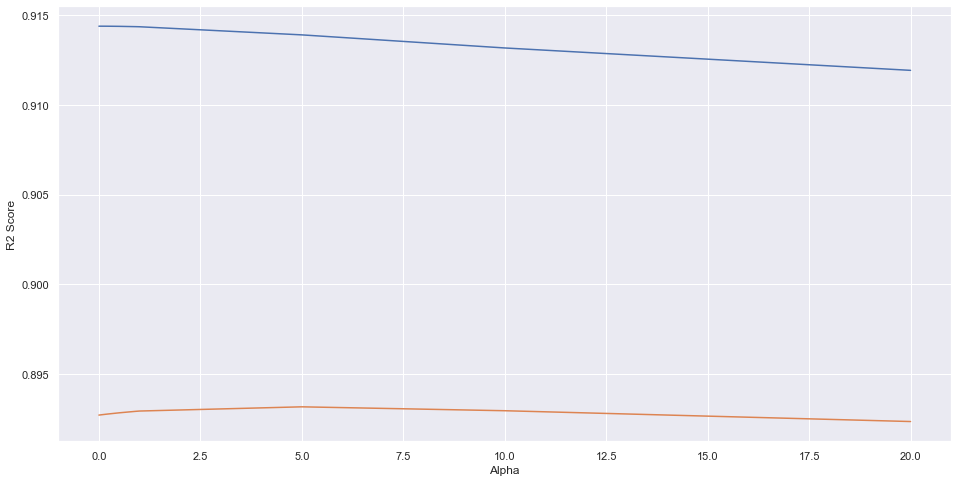

In [68]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### Checking the best parameter(Alpha value)

In [69]:
model_cv.best_params_

{'alpha': 5.0}

#### check the r2_score with alpha = 5.0

In [70]:
from sklearn.metrics import r2_score
ridge1 = Ridge(alpha = 5)
ridge1.fit(X_train,y_train)

y_pred_train = ridge1.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge1.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9133444646594931
0.9061868481093129


**Training set r2_score = 91.33%**

**Test set r2_score = 90.61%**

#### Check the mean squared error

In [71]:
mean_squared_error(y_test, ridge1.predict(X_test))

0.01379853536149401

**The Mean squared error is = 0.0137**

In [72]:
# Put the Features and coefficienst in a dataframe
ridge1_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge1.coef_.round(4)})
ridge1_df.reset_index(drop=True, inplace=True)
ridge1_df

Features  Coefficient
0                LotArea       0.0197
1               BldgType      -0.0228
2            OverallQual       0.0776
3            OverallCond       0.0508
4               BsmtQual       0.0194
5           BsmtExposure       0.0131
6             BsmtFinSF1       0.0257
7            TotalBsmtSF       0.0335
8              HeatingQC       0.0158
9              GrLivArea       0.1125
10          BsmtFullBath       0.0196
11              FullBath       0.0163
12           KitchenQual       0.0154
13            Fireplaces       0.0246
14          GarageFinish       0.0158
15            GarageCars       0.0429
16         SaleCondition       0.0159
17          IsRemodelled      -0.0158
18     BuiltOrRemodelAge      -0.0239
19        OldOrNewGarage       0.0136
20           MSZoning_FV       0.0819
21           MSZoning_RH       0.0345
22           MSZoning_RL       0.1233
23           MSZoning_RM       0.0929
24  Neighborhood_Crawfor       0.0227
25  Neighborhood_Edwards      -0.0175
26  Neighborhood_NoRidge       0.0145
27  Neighborhood_NridgHt       0.0268
28  Neighborhood_OldTown      -0.0165
29  Neighborhood_StoneBr       0.0210
30       RoofStyle_Gable      -0.0168
31         RoofStyle_Hip      -0.0151
32   Exterior1st_AsphShn       0.0019
33    Exterior1st_CBlock      -0.0012
34   Exterior1st_CemntBd      -0.0391
35   Exterior1st_VinylSd      -0.0346
36   Exterior1st_Wd Sdng      -0.0200
37   Exterior2nd_AsphShn       0.0011
38    Exterior2nd_CBlock      -0.0012
39   Exterior2nd_CmentBd       0.0274
40   Exterior2nd_VinylSd       0.0305
41   Exterior2nd_Wd Sdng       0.0114
42     Foundation_CBlock       0.0239
43      Foundation_PConc       0.0386
44       Foundation_Slab       0.0121
45     GarageType_Attchd       0.0579
46    GarageType_Basment       0.0098
47    GarageType_BuiltIn       0.0203
48     GarageType_Detchd       0.0382
49       GarageType_None       0.0142

In [73]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge1_coeff_dict = dict(pd.Series(ridge1.coef_.round(4), index = X_train.columns))
ridge1_coeff_dict

{'LotArea': 0.0197,
 'BldgType': -0.0228,
 'OverallQual': 0.0776,
 'OverallCond': 0.0508,
 'BsmtQual': 0.0194,
 'BsmtExposure': 0.0131,
 'BsmtFinSF1': 0.0257,
 'TotalBsmtSF': 0.0335,
 'HeatingQC': 0.0158,
 'GrLivArea': 0.1125,
 'BsmtFullBath': 0.0196,
 'FullBath': 0.0163,
 'KitchenQual': 0.0154,
 'Fireplaces': 0.0246,
 'GarageFinish': 0.0158,
 'GarageCars': 0.0429,
 'SaleCondition': 0.0159,
 'IsRemodelled': -0.0158,
 'BuiltOrRemodelAge': -0.0239,
 'OldOrNewGarage': 0.0136,
 'MSZoning_FV': 0.0819,
 'MSZoning_RH': 0.0345,
 'MSZoning_RL': 0.1233,
 'MSZoning_RM': 0.0929,
 'Neighborhood_Crawfor': 0.0227,
 'Neighborhood_Edwards': -0.0175,
 'Neighborhood_NoRidge': 0.0145,
 'Neighborhood_NridgHt': 0.0268,
 'Neighborhood_OldTown': -0.0165,
 'Neighborhood_StoneBr': 0.021,
 'RoofStyle_Gable': -0.0168,
 'RoofStyle_Hip': -0.0151,
 'Exterior1st_AsphShn': 0.0019,
 'Exterior1st_CBlock': -0.0012,
 'Exterior1st_CemntBd': -0.0391,
 'Exterior1st_VinylSd': -0.0346,
 'Exterior1st_Wd Sdng': -0.02,
 'Exterior

In [74]:
# Do an RFE to minimise the features to 15
X_train_ridge1 = X_train[ridge1_df.Features]

lm1 = LinearRegression()
lm1.fit(X_train_ridge1, y_train)

# running RFE
rfe1 = RFE(lm1, 15)            
rfe1 = rfe1.fit(X_train_ridge1, y_train)

In [75]:
# Method to get the coefficient values
# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge1.columns, rfe1.support_, rfe1.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(lambda x:ridge1_coeff_dict[x])
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
10       MSZoning_RL         True            1       0.1233
4          GrLivArea         True            1       0.1125
11       MSZoning_RM         True            1       0.0929
8        MSZoning_FV         True            1       0.0819
0        OverallQual         True            1       0.0776
1        OverallCond         True            1       0.0508
6         GarageCars         True            1       0.0429
14  Foundation_PConc         True            1       0.0386
9        MSZoning_RH         True            1       0.0345
3        TotalBsmtSF         True            1       0.0335

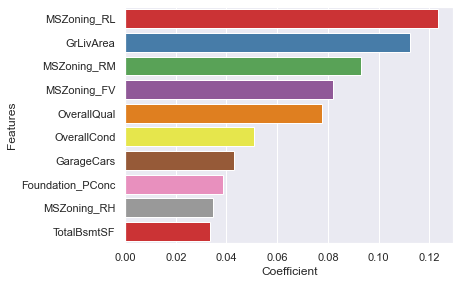

In [76]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


#### Lasso Regression

**Lasso Regression** [source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html ]

Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [77]:
## Applying 10 Fold cross validation and then building the models
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.015365      0.003516         0.001566        0.004697        0.001   
1       0.006250      0.007654         0.000000        0.000000        0.010   
2       0.006249      0.007653         0.002215        0.004874        0.100   
3       0.004692      0.007167         0.002213        0.004866        1.000   
4       0.005334      0.006992         0.001562        0.004687        5.000   
5       0.005337      0.006993         0.004693        0.007169       10.000   
6       0.004680      0.007148         0.002219        0.004884       20.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.937780           0.902018           0.936011   
1   {'alpha': 0.01}           0.922027           0.901703           0.924842   
2    {'alpha': 0.1}           0.731598           0.729588           0.764741   
3    {'alpha': 1.0}          -0.002855          -0.004793          -0.000208   
4    {'alpha': 5.0}          -0.002855          -0.004793          -0.000208   
5   {'alpha': 10.0}          -0.002855          -0.004793          -0.000208   
6   {'alpha': 20.0}          -0.002855          -0.004793          -0.000208   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.883362  ...            0.906951            0.913286   
1           0.888699  ...            0.891123            0.895716   
2           0.727100  ...            0.715466            0.729139   
3          -0.015601  ...            0.000000            0.000000   
4          -0.015601  ...            0.000000            0.000000   
5          -0.015601  ...            0.000000            0.000000   
6          -0.015601  ...            0.000000            0.000000   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.907174            0.911916            0.909465   
1            0.891816            0.893748            0.895702   
2            0.727712            0.715355            0.726628   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   
5            0.000000            0.000000            0.000000   
6            0.000000            0.000000            0.000000   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.924891            0.910245            0.911929   
1            0.909598            0.894640            0.897838   
2            0.740549            0.727118            0.736175   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   
5            0.000000            0.000000            0.000000   
6            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0          0.911223         0.005230  
1          0.895359         0.005265  
2          0.725440         0.008736  
3          0.000000         0.000000  
4          0.000000         0.000000  
5          0.000000         0.000000  
6          0.000000         0.000000  

[7 rows x 31 columns]

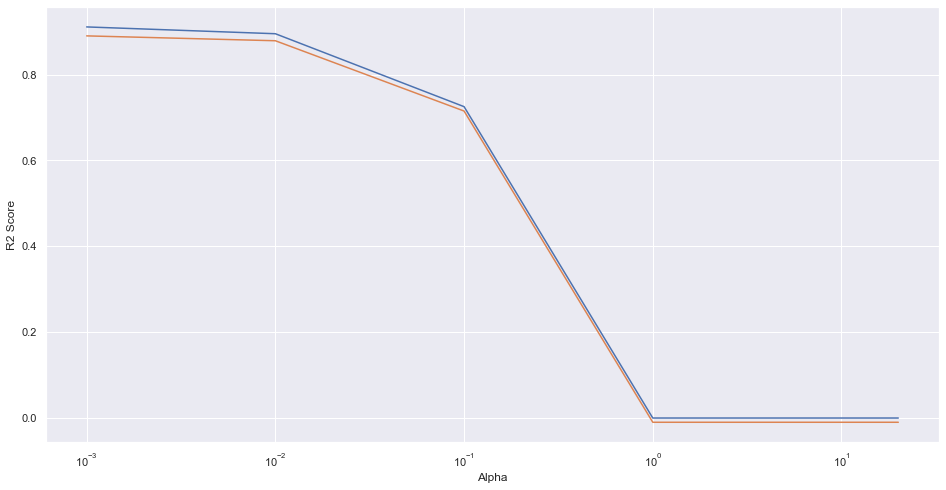

In [79]:
# plotting mean test and train scoes with alpha
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

#### Checking the best parameter(Alpha value)

In [80]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

#### check the r2_score with alpha = 0.001

In [81]:
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train,y_train)

y_train_pred = lasso1.predict(X_train)
y_test_pred = lasso1.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.91057671442877
0.9083467845826255


**Training set r2_score = 91.05%**

**Test set r2_score = 90.83%**

#### Find the mean squared error

In [82]:
# Check the mean squared error
mean_squared_error(y_test, lasso1.predict(X_test))

0.013480840462592066

In [83]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso1_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso1.coef_.round(4)})
lasso1_df = lasso1_df[lasso1_df['Coefficient'] != 0.00]
lasso1_df.reset_index(drop=True, inplace=True)
lasso1_df

Features  Coefficient
0                LotArea       0.0190
1               BldgType      -0.0198
2            OverallQual       0.0828
3            OverallCond       0.0510
4               BsmtQual       0.0168
5           BsmtExposure       0.0128
6             BsmtFinSF1       0.0264
7            TotalBsmtSF       0.0329
8              HeatingQC       0.0140
9              GrLivArea       0.1138
10          BsmtFullBath       0.0176
11              FullBath       0.0129
12           KitchenQual       0.0166
13            Fireplaces       0.0247
14          GarageFinish       0.0161
15            GarageCars       0.0427
16         SaleCondition       0.0175
17          IsRemodelled      -0.0158
18     BuiltOrRemodelAge      -0.0239
19        OldOrNewGarage       0.0104
20           MSZoning_FV       0.0593
21           MSZoning_RH       0.0215
22           MSZoning_RL       0.0813
23           MSZoning_RM       0.0519
24  Neighborhood_Crawfor       0.0207
25  Neighborhood_Edwards      -0.0149
26  Neighborhood_NoRidge       0.0119
27  Neighborhood_NridgHt       0.0240
28  Neighborhood_OldTown      -0.0151
29  Neighborhood_StoneBr       0.0185
30       RoofStyle_Gable      -0.0029
31         RoofStyle_Hip      -0.0010
32   Exterior1st_AsphShn       0.0012
33    Exterior1st_CBlock      -0.0018
34   Exterior1st_CemntBd      -0.0092
35   Exterior1st_VinylSd      -0.0004
36   Exterior1st_Wd Sdng      -0.0115
37   Exterior2nd_Wd Sdng       0.0018
38     Foundation_CBlock       0.0157
39      Foundation_PConc       0.0323
40       Foundation_Slab       0.0078
41     GarageType_Attchd       0.0218
42    GarageType_BuiltIn       0.0019
43     GarageType_Detchd       0.0041
44       GarageType_None      -0.0022

In [84]:
# Put the Features and Coefficients in dictionary
lasso1_coeff_dict = dict(pd.Series(lasso1.coef_, index = X_train.columns))
lasso1_coeff_dict

{'LotArea': 0.01897235721085034,
 'BldgType': -0.01980668354529978,
 'OverallQual': 0.08282384265599194,
 'OverallCond': 0.05097673856523346,
 'BsmtQual': 0.016831522283970432,
 'BsmtExposure': 0.012810678198202221,
 'BsmtFinSF1': 0.026386184530384372,
 'TotalBsmtSF': 0.03287599666429533,
 'HeatingQC': 0.013977591623918165,
 'GrLivArea': 0.11376198878695741,
 'BsmtFullBath': 0.017557612279315512,
 'FullBath': 0.012945930193675188,
 'KitchenQual': 0.016609046923492576,
 'Fireplaces': 0.024650366072260618,
 'GarageFinish': 0.016113166923115978,
 'GarageCars': 0.042683955286580526,
 'SaleCondition': 0.01752311228220191,
 'IsRemodelled': -0.015801299503192312,
 'BuiltOrRemodelAge': -0.02386691522458972,
 'OldOrNewGarage': 0.010449261118012226,
 'MSZoning_FV': 0.05934186841565675,
 'MSZoning_RH': 0.02152489382430048,
 'MSZoning_RL': 0.08125094906242311,
 'MSZoning_RM': 0.05192384149690791,
 'Neighborhood_Crawfor': 0.020730016389849636,
 'Neighborhood_Edwards': -0.01493776640824787,
 'Neighb

In [85]:
# Do an RFE to minimise the features to 15

X_train_lasso1 = X_train[lasso1_df.Features]

lm2 = LinearRegression()
lm2.fit(X_train_lasso1, y_train)

# running RFE

rfe2 = RFE(lm2, 15)            
rfe2 = rfe2.fit(X_train_lasso1, y_train)

In [86]:
# Method to get the coefficient values

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso1.columns, rfe2.support_, rfe2.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(lambda x:lasso1_coeff_dict[x])
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
5          GrLivArea         True            1     0.113762
1        OverallQual         True            1     0.082824
12       MSZoning_RL         True            1     0.081251
10       MSZoning_FV         True            1     0.059342
13       MSZoning_RM         True            1     0.051924
2        OverallCond         True            1     0.050977
8         GarageCars         True            1     0.042684
4        TotalBsmtSF         True            1     0.032876
14  Foundation_PConc         True            1     0.032325
3         BsmtFinSF1         True            1     0.026386

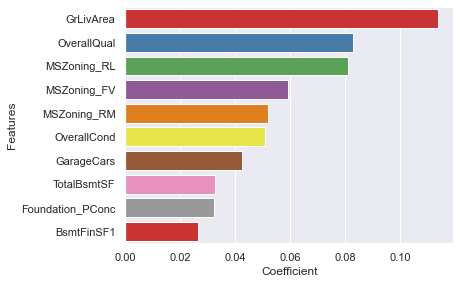

In [87]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

## 07. Appendix - Subjective Questions

#### Build Ridge Model by doubling optimal alpha 

In [88]:
## We have found the optimal alpha value as 5 for ridge
ridge2 = Ridge(alpha = 10)
ridge2.fit(X_train,y_train)

y_pred_train = ridge2.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge2.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9126945395762294
0.9063944066117063


#### Training r2_score = 91.26%
#### Test r2_score = 90.63%

In [89]:
# Check the mean squared error
mean_squared_error(y_test, ridge2.predict(X_test))

0.013768006557407021

**The Mean squared error is = 0.0137**

In [90]:
# Put the Features and coefficienst in a dataframe
ridge2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge2.coef_.round(4)})
ridge2_df.reset_index(drop=True, inplace=True)
ridge2_df

Features  Coefficient
0                LotArea       0.0197
1               BldgType      -0.0226
2            OverallQual       0.0784
3            OverallCond       0.0508
4               BsmtQual       0.0192
5           BsmtExposure       0.0129
6             BsmtFinSF1       0.0258
7            TotalBsmtSF       0.0337
8              HeatingQC       0.0156
9              GrLivArea       0.1112
10          BsmtFullBath       0.0194
11              FullBath       0.0168
12           KitchenQual       0.0162
13            Fireplaces       0.0249
14          GarageFinish       0.0158
15            GarageCars       0.0422
16         SaleCondition       0.0168
17          IsRemodelled      -0.0160
18     BuiltOrRemodelAge      -0.0240
19        OldOrNewGarage       0.0131
20           MSZoning_FV       0.0695
21           MSZoning_RH       0.0282
22           MSZoning_RL       0.0995
23           MSZoning_RM       0.0718
24  Neighborhood_Crawfor       0.0226
25  Neighborhood_Edwards      -0.0169
26  Neighborhood_NoRidge       0.0145
27  Neighborhood_NridgHt       0.0263
28  Neighborhood_OldTown      -0.0163
29  Neighborhood_StoneBr       0.0207
30       RoofStyle_Gable      -0.0162
31         RoofStyle_Hip      -0.0146
32   Exterior1st_AsphShn       0.0019
33    Exterior1st_CBlock      -0.0012
34   Exterior1st_CemntBd      -0.0314
35   Exterior1st_VinylSd      -0.0281
36   Exterior1st_Wd Sdng      -0.0191
37   Exterior2nd_AsphShn       0.0011
38    Exterior2nd_CBlock      -0.0012
39   Exterior2nd_CmentBd       0.0202
40   Exterior2nd_VinylSd       0.0245
41   Exterior2nd_Wd Sdng       0.0103
42     Foundation_CBlock       0.0226
43      Foundation_PConc       0.0376
44       Foundation_Slab       0.0117
45     GarageType_Attchd       0.0488
46    GarageType_Basment       0.0073
47    GarageType_BuiltIn       0.0161
48     GarageType_Detchd       0.0300
49       GarageType_None       0.0094

In [91]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge2_coeff_dict = dict(pd.Series(ridge2.coef_.round(4), index = X_train.columns))
ridge2_coeff_dict

{'LotArea': 0.0197,
 'BldgType': -0.0226,
 'OverallQual': 0.0784,
 'OverallCond': 0.0508,
 'BsmtQual': 0.0192,
 'BsmtExposure': 0.0129,
 'BsmtFinSF1': 0.0258,
 'TotalBsmtSF': 0.0337,
 'HeatingQC': 0.0156,
 'GrLivArea': 0.1112,
 'BsmtFullBath': 0.0194,
 'FullBath': 0.0168,
 'KitchenQual': 0.0162,
 'Fireplaces': 0.0249,
 'GarageFinish': 0.0158,
 'GarageCars': 0.0422,
 'SaleCondition': 0.0168,
 'IsRemodelled': -0.016,
 'BuiltOrRemodelAge': -0.024,
 'OldOrNewGarage': 0.0131,
 'MSZoning_FV': 0.0695,
 'MSZoning_RH': 0.0282,
 'MSZoning_RL': 0.0995,
 'MSZoning_RM': 0.0718,
 'Neighborhood_Crawfor': 0.0226,
 'Neighborhood_Edwards': -0.0169,
 'Neighborhood_NoRidge': 0.0145,
 'Neighborhood_NridgHt': 0.0263,
 'Neighborhood_OldTown': -0.0163,
 'Neighborhood_StoneBr': 0.0207,
 'RoofStyle_Gable': -0.0162,
 'RoofStyle_Hip': -0.0146,
 'Exterior1st_AsphShn': 0.0019,
 'Exterior1st_CBlock': -0.0012,
 'Exterior1st_CemntBd': -0.0314,
 'Exterior1st_VinylSd': -0.0281,
 'Exterior1st_Wd Sdng': -0.0191,
 'Exterio

In [92]:
# Do an RFE to minimise the features to 15
X_train_ridge2 = X_train[ridge2_df.Features]

lm3 = LinearRegression()
lm3.fit(X_train_ridge2, y_train)

# running RFE
rfe3 = RFE(lm3, 15)            
rfe3 = rfe.fit(X_train_ridge2, y_train)

In [93]:
temp3_df = pd.DataFrame(list(zip( X_train_ridge2.columns, rfe3.support_, rfe3.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temP3_df = temp3_df.loc[temp3_df['rfe_support'] == True]
temp3_df.reset_index(drop=True, inplace=True)

temp3_df['Coefficient'] = temp3_df['Features'].apply(lambda x: ridge2_coeff_dict[x])
temp3_df = temp3_df.sort_values(by=['Coefficient'], ascending=False)
temp3_df = temp3_df.head(10)
temp3_df

Features  rfe_support  rfe_ranking  Coefficient
9           GrLivArea         True            1       0.1112
22        MSZoning_RL         True            1       0.0995
2         OverallQual         True            1       0.0784
23        MSZoning_RM         True            1       0.0718
20        MSZoning_FV         True            1       0.0695
3         OverallCond         True            1       0.0508
45  GarageType_Attchd         True            1       0.0488
15         GarageCars         True            1       0.0422
43   Foundation_PConc         True            1       0.0376
7         TotalBsmtSF         True            1       0.0337

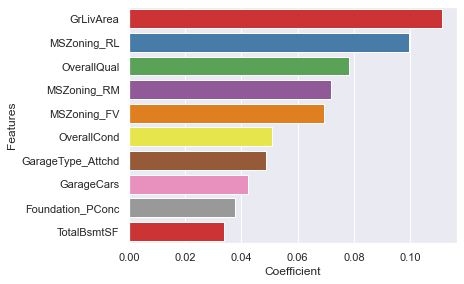

In [94]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp3_df)
plt.show()

#### Building Lasso Model by doubling the optimal alpha

In [95]:
## The optimal value we have found is 0.001
lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train,y_train)

y_train_pred = lasso2.predict(X_train)
y_test_pred = lasso2.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9071360177606586
0.9047839684929507


**Training set r2_score = 90.71%**

**Test set r2_score = 90.47%**

In [96]:
##Check the mean squared error
mean_squared_error(y_test, lasso2.predict(X_test))

0.014004878327316646

#### The mean squared error = 0.014

In [97]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso2.coef_.round(4)})
lasso2_df = lasso2_df[lasso2_df['Coefficient'] != 0.00]
lasso2_df.reset_index(drop=True, inplace=True)
lasso2_df

Features  Coefficient
0                LotArea       0.0189
1               BldgType      -0.0167
2            OverallQual       0.0862
3            OverallCond       0.0499
4               BsmtQual       0.0144
5           BsmtExposure       0.0111
6             BsmtFinSF1       0.0271
7            TotalBsmtSF       0.0332
8              HeatingQC       0.0128
9              GrLivArea       0.1128
10          BsmtFullBath       0.0168
11              FullBath       0.0116
12           KitchenQual       0.0179
13            Fireplaces       0.0244
14          GarageFinish       0.0165
15            GarageCars       0.0437
16         SaleCondition       0.0191
17          IsRemodelled      -0.0158
18     BuiltOrRemodelAge      -0.0246
19        OldOrNewGarage       0.0084
20           MSZoning_FV       0.0289
21           MSZoning_RH       0.0059
22           MSZoning_RL       0.0252
23  Neighborhood_Crawfor       0.0188
24  Neighborhood_Edwards      -0.0137
25  Neighborhood_NoRidge       0.0101
26  Neighborhood_NridgHt       0.0219
27  Neighborhood_OldTown      -0.0141
28  Neighborhood_StoneBr       0.0163
29       RoofStyle_Gable      -0.0009
30   Exterior1st_AsphShn       0.0002
31    Exterior1st_CBlock      -0.0011
32   Exterior1st_CemntBd      -0.0074
33   Exterior1st_Wd Sdng      -0.0100
34     Foundation_CBlock       0.0077
35      Foundation_PConc       0.0260
36       Foundation_Slab       0.0040
37     GarageType_Attchd       0.0183
38    GarageType_Basment      -0.0001
39       GarageType_None      -0.0035

In [98]:
# Put the Features and Coefficients in dictionary
lasso2_coeff_dict = dict(pd.Series(lasso2.coef_, index = X_train.columns))
lasso2_coeff_dict

{'LotArea': 0.018872668128582314,
 'BldgType': -0.016744259082382938,
 'OverallQual': 0.0862353010231053,
 'OverallCond': 0.049893623448597546,
 'BsmtQual': 0.014383233122412931,
 'BsmtExposure': 0.011137756175200532,
 'BsmtFinSF1': 0.02709722089281643,
 'TotalBsmtSF': 0.03323656555617143,
 'HeatingQC': 0.012823273536671934,
 'GrLivArea': 0.11280948949936044,
 'BsmtFullBath': 0.016808872854315867,
 'FullBath': 0.011645872920038127,
 'KitchenQual': 0.01792987544618525,
 'Fireplaces': 0.024413455967528763,
 'GarageFinish': 0.016536826222148186,
 'GarageCars': 0.043712565037158244,
 'SaleCondition': 0.019087365950339896,
 'IsRemodelled': -0.015758230232055307,
 'BuiltOrRemodelAge': -0.024560997213284388,
 'OldOrNewGarage': 0.008362128707864618,
 'MSZoning_FV': 0.02885723704186798,
 'MSZoning_RH': 0.005880949624527104,
 'MSZoning_RL': 0.02518219534740935,
 'MSZoning_RM': 0.0,
 'Neighborhood_Crawfor': 0.01884145546345161,
 'Neighborhood_Edwards': -0.013675622395343529,
 'Neighborhood_NoRidg

In [99]:
# Do an RFE to minimise the features to 15

X_train_lasso2 = X_train[lasso2_df.Features]

lm4 = LinearRegression()
lm4.fit(X_train_lasso2, y_train)

# running RFE

rfe4 = RFE(lm4, 15)            
rfe4 = rfe.fit(X_train_lasso2, y_train)

In [100]:
# Assign top 10 features to a temp dataframe for further display in the bar plot

temp4_df = pd.DataFrame(list(zip( X_train_lasso2.columns, rfe4.support_, rfe4.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp4_df = temp4_df.loc[temp4_df['rfe_support'] == True]
temp4_df.reset_index(drop=True, inplace=True)

temp4_df['Coefficient'] = temp4_df['Features'].apply(lambda x:lasso2_coeff_dict[x])
temp4_df = temp4_df.sort_values(by=['Coefficient'], ascending=False)
temp4_df = temp4_df.head(10)
temp4_df

Features  rfe_support  rfe_ranking  Coefficient
9          GrLivArea         True            1     0.112809
2        OverallQual         True            1     0.086235
3        OverallCond         True            1     0.049894
15        GarageCars         True            1     0.043713
7        TotalBsmtSF         True            1     0.033237
20       MSZoning_FV         True            1     0.028857
6         BsmtFinSF1         True            1     0.027097
35  Foundation_PConc         True            1     0.025977
22       MSZoning_RL         True            1     0.025182
13        Fireplaces         True            1     0.024413

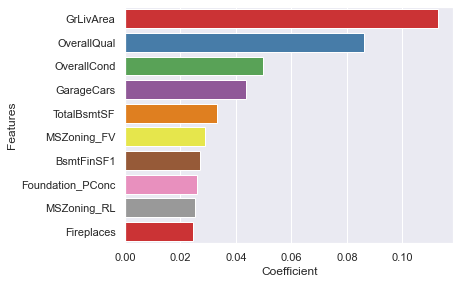

In [101]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp4_df)
plt.show()

#### Build a Lasso Model after dropping top variables generated at the first - i.e. - 

 - GrLivArea 	
 - OverallQual 	
 - MSZoning_RL 	
 - MSZoning_FV 	
 - MSZoning_RM 	

In [102]:
X_train.drop(['GrLivArea','OverallQual','MSZoning_RL','MSZoning_FV','MSZoning_RM'],axis=1, inplace=True)

In [103]:
X_train.shape

(1017, 45)

In [104]:
X_test.drop(['GrLivArea','OverallQual','MSZoning_RL','MSZoning_FV','MSZoning_RM'],axis=1, inplace=True)

In [105]:
X_test.shape

(436, 45)

In [106]:
lasso3 = Lasso(alpha=0.001)
lasso3.fit(X_train,y_train)

y_train_pred = lasso3.predict(X_train)
y_test_pred = lasso3.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8568591809441104
0.8271841201132758


In [107]:
##Check the mean squared error
mean_squared_error(y_test, lasso3.predict(X_test))

0.02541867511735727

In [108]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso3_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso3.coef_.round(4)})
lasso3_df = lasso3_df[lasso3_df['Coefficient'] != 0.00]
lasso3_df.reset_index(drop=True, inplace=True)
lasso3_df

Features  Coefficient
0                LotArea       0.0330
1               BldgType      -0.0254
2            OverallCond       0.0560
3               BsmtQual       0.0364
4           BsmtExposure       0.0059
5             BsmtFinSF1       0.0245
6            TotalBsmtSF       0.0620
7              HeatingQC       0.0148
8           BsmtFullBath       0.0128
9               FullBath       0.0829
10           KitchenQual       0.0527
11            Fireplaces       0.0539
12          GarageFinish       0.0181
13            GarageCars       0.0662
14         SaleCondition       0.0178
15          IsRemodelled      -0.0164
16     BuiltOrRemodelAge      -0.0247
17        OldOrNewGarage       0.0092
18           MSZoning_RH       0.0071
19  Neighborhood_Crawfor       0.0270
20  Neighborhood_Edwards      -0.0173
21  Neighborhood_NoRidge       0.0363
22  Neighborhood_NridgHt       0.0242
23  Neighborhood_OldTown      -0.0164
24  Neighborhood_StoneBr       0.0233
25       RoofStyle_Gable      -0.0211
26         RoofStyle_Hip      -0.0104
27   Exterior1st_AsphShn       0.0064
28    Exterior1st_CBlock      -0.0009
29   Exterior1st_CemntBd      -0.0066
30   Exterior1st_VinylSd      -0.0134
31   Exterior1st_Wd Sdng      -0.0032
32    Exterior2nd_CBlock      -0.0003
33     Foundation_CBlock       0.0024
34      Foundation_PConc       0.0324
35       Foundation_Slab       0.0127
36     GarageType_Attchd       0.0277
37    GarageType_Basment       0.0038
38    GarageType_BuiltIn       0.0205
39     GarageType_Detchd       0.0118

In [109]:
# Put the Features and Coefficients in dictionary
lasso3_coeff_dict = dict(pd.Series(lasso3.coef_, index = X_train.columns))
lasso3_coeff_dict

{'LotArea': 0.033037771454649444,
 'BldgType': -0.025350500498288783,
 'OverallCond': 0.05600270833009831,
 'BsmtQual': 0.03641452597004248,
 'BsmtExposure': 0.005924408206209643,
 'BsmtFinSF1': 0.024535506345604995,
 'TotalBsmtSF': 0.06202277458970734,
 'HeatingQC': 0.014762171183627559,
 'BsmtFullBath': 0.012841387053979489,
 'FullBath': 0.08290403846892584,
 'KitchenQual': 0.05269918378878955,
 'Fireplaces': 0.05394429171101313,
 'GarageFinish': 0.018064994519067318,
 'GarageCars': 0.06624750796654338,
 'SaleCondition': 0.017769561667375623,
 'IsRemodelled': -0.016414779449298002,
 'BuiltOrRemodelAge': -0.02468622525297743,
 'OldOrNewGarage': 0.00922130449845195,
 'MSZoning_RH': 0.007145956784929427,
 'Neighborhood_Crawfor': 0.02695556189697126,
 'Neighborhood_Edwards': -0.017324984351492472,
 'Neighborhood_NoRidge': 0.03625136358737837,
 'Neighborhood_NridgHt': 0.024169691999682795,
 'Neighborhood_OldTown': -0.016373445813531156,
 'Neighborhood_StoneBr': 0.023318751001101833,
 'Roo

In [110]:
# Do an RFE to minimise the features to 15

X_train_lasso3 = X_train[lasso3_df.Features]

lm5 = LinearRegression()
lm5.fit(X_train_lasso3, y_train)

# running RFE

rfe5 = RFE(lm5, 15)            
rfe5 = rfe.fit(X_train_lasso3, y_train)

In [111]:
# Assign top 5 features to a temp dataframe for further display in the bar plot

temp5_df = pd.DataFrame(list(zip( X_train_lasso3.columns, rfe5.support_, rfe5.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp5_df = temp5_df.loc[temp5_df['rfe_support'] == True]
temp5_df.reset_index(drop=True, inplace=True)

temp5_df['Coefficient'] = temp5_df['Features'].apply(lambda x:lasso3_coeff_dict[x])
temp5_df = temp5_df.sort_values(by=['Coefficient'], ascending=False)
temp5_df = temp5_df.head(5)
temp5_df

Features  rfe_support  rfe_ranking  Coefficient
9      FullBath         True            1     0.082904
13   GarageCars         True            1     0.066248
6   TotalBsmtSF         True            1     0.062023
2   OverallCond         True            1     0.056003
11   Fireplaces         True            1     0.053944

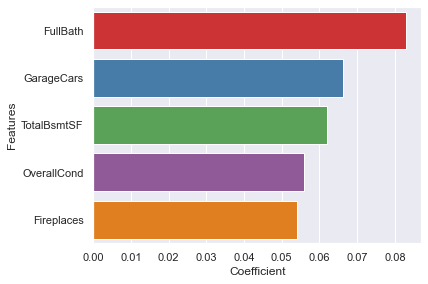

In [112]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp5_df)
plt.show()